# Breast Cancer Classification Using KNN

I will be using the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset to do breast cancer classification that can help diagnose patients. This data set provides a good foundation for a classification problem and can be used for similar classification problems. Here, i will use KNN as the classifier to train and evaluate the model. 

- Data set: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- Classifier: KNN

## 0. Import useful libraries

In [1]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# Import some necessary libararies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RANDOM_STATE = 42

## 1.Data preparation

### 1.1 Load the data
- Load breast cancer data from scikit-learn
- Transform the raw data  (Bunch object) to a dataframe.

In [3]:
from sklearn.datasets import load_breast_cancer

# Load the dataset from scikit-learn.
cancer = load_breast_cancer()
# cancer.keys() 

In [4]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 1.2 Clean the data
- Cancer dataframe is clean. No missing values, wrong data types.

In [5]:
print(cancer_df.shape)

(569, 31)


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 1.3 Explore class distribution
- Check if the class is imbalance.
- The data of class 1 (having breast cancer) is a bit more than the data of class 0 (without breast cancer), but in reality it is not considered heavily imbalance and can be used for analysis.

In [7]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

## 2. Split data

### 2.1 Train-test split 
- Since data is not large here, i only split the data into trainning and test data, no validation data.
- Data can be further split into train, dev, test if you have larger data set.

In [8]:
from sklearn.model_selection import train_test_split

X = cancer_df.drop('target', axis=1)
y = cancer_df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = RANDOM_STATE)

## 3. Apply KNN classifier

### 3.1 Training model 
- using random number of neighbors as knn parameter

In [9]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model_fitting(X_train, X_test, y_train, y_test, n_neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)

    preds = knn.predict(X_test)
    score = knn.score(X_test, y_test) 
    print('The mean accuracy of this KNN classifier is: {}'.format(score))
    
    return preds, knn

In [10]:
# here just set the # of neighbors =1 to see the model performance
n_neighbors= 1
preds_default, knn_default = knn_model_fitting(X_train, X_test, y_train, y_test, n_neighbors)

The mean accuracy of this KNN classifier is: 0.9300699300699301


### 3.2  Tunning parameter
- Tunning parameter n_neighbors to achieve best model performance

In [11]:
def get_best_knn_neighbors():
    
    global X_train, X_test, y_train, y_test
    
    best_scores = 0
    best_neighbor = 0
    for i, k in enumerate(range(1,20)):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score > best_scores:
            best_scores = score
            best_neighbor = k
    
    return best_neighbor

get_best_knn_neighbors()

11

In [12]:
# fit knn classifier with best parameter
best_n_neighbors= get_best_knn_neighbors()
preds_tuned, knn_tuned = knn_model_fitting(X_train, X_test, y_train, y_test, best_n_neighbors)

The mean accuracy of this KNN classifier is: 0.9790209790209791


## 4. Model evaluation 
- using confusion matrix
- compare model performance before and after tunning features

Before parameter tunning 
Class 1: Malignant 
Class 0: Bengin


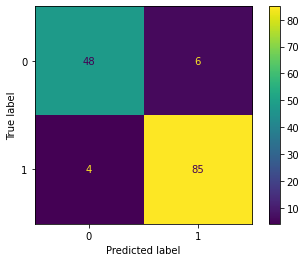

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# make a confusion matrix
print('Before parameter tunning \nClass 1: Malignant \nClass 0: Bengin')
plot_confusion_matrix(knn_default, X_test, y_test);

After parameter tunning 
Class 1: Malignant 
Class 0: Bengin


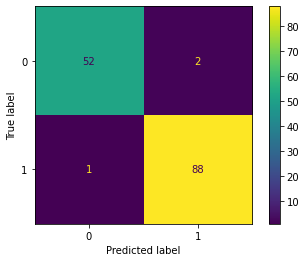

In [14]:
# make another confusion matrix
print('After parameter tunning \nClass 1: Malignant \nClass 0: Bengin')
plot_confusion_matrix(knn_tuned, X_test, y_test);

### Findings:

1. Hyper-parameter tunning did increase the accuracy of the knn classifier (from 0.93 to 0.98). 
2. Both the number of false positives and false negatives has decreased (fp: 6 to 2, fn: 4 to 1). 

## 5. Overfitting test

In [15]:
def overfitting_num_neighbors():
    
    global X_train, X_test, y_train, y_test
    k_scores = []
    for i, k in enumerate(range(1,20,2)):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        k_scores.append((k, train_score, test_score))
        
    k_overfitting = max(k_scores, key = lambda x: x[1])

    return k_overfitting

In [16]:
# n_neigbbors, training score, test score
overfitting_num_neighbors()

(1, 1.0, 0.9300699300699301)

### Findings:

1. When parameter n_neighbors = 1, the training score is 1, which means the model performs perfectly on the training data. However, what we want is a perfect/highest score on the test data (when n_neighbors = 11), which means the model can perform better on new input data. 

## Test model with new data
- Predict result by giving a series of new breast cells data

In [17]:
# you can change the data below and give a try
new_data = np.array([2.799e+02, 1.038e+01, 1.228e+02, 1.701e+04, 1.184e-01, 
                     2.776e-01,3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 
                     1.095e+00, 9.053e+01,4.589e+00, 1.534e-02, 6.399e-03, 
                     4.904e-02, 5.373e-02, 1.587e-02,3.003e-02, 7.193e-03, 
                     2.558e-01, 1.733e+01, 1.856e+02, 2.019e+01,1.623e-01, 
                     3.656e-01, 2.119e-01, 2.654e-01, 6.601e-01, 1.139e-01,]).reshape(1,-1)

In [18]:
# prediction
result = knn_tuned.predict(new_data)
if result == 0:
    print('Bengin')
else:
    print('Malignant')


Bengin
